In [40]:
library("DESeq2")
library("gplots")
# BiocManager::install("sva")
library("sva")


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Warning message:
“package ‘genefilter’ was built under R version 4.1.1”

Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel

Warning message:
“package ‘BiocParallel’ was built under R version 4.1.2”


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



[1] 1 1
Found 4 batches
Using null model in ComBat-seq.
Adjusting for 0 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data
       1  2  3  4  5  6  7  8
 [1,]  8  9  8  9  8  8  8  8
 [2,] 10 10 10 10 11 11 11 11
 [3,] 10 10 10 10  9  9  9  9
 [4,] 10 10 10 10  9  9  9  9
 [5,]  9  8  8  8  8  7  8  8
 [6,] 14 14 14 14 15 15 15 15
 [7,]  6  6  7  7  7  7  6  6
 [8,] 14 14 14 14 14 13 14 14
 [9,] 11 11 11 11 12 12 12 12
[10,] 12 11 12 12 12 12 12 12
[11,]  8  8  8  8  8  7  7  8
[12,]  8  8  9  9  9  9  9  9
[13,]  5  5  5  5  5  4  5  5
[14,] 16 16 16 16 17 16 17 17
[15,]  6  6  7  6  7  6  6  6
[16,] 18 18 19 18 19 19 19 19
[17,]  7  7  7  7  8  8  8  7
[18,]  8  8  7  8  8  8  8  8
[19,] 12 12 12 12 12 12 12 12
[20,] 11 11 11 11 11 12 11 11
[21,]  9  9 10  9  9  8  9  9
[22,]  9  9  9  9  9  8  9  9
[23,] 11 11 11 11 12 11 11 11
[24,]  0  0  0  0  0  0  0  0
[25,]  0  0  0  0  0  0  0  

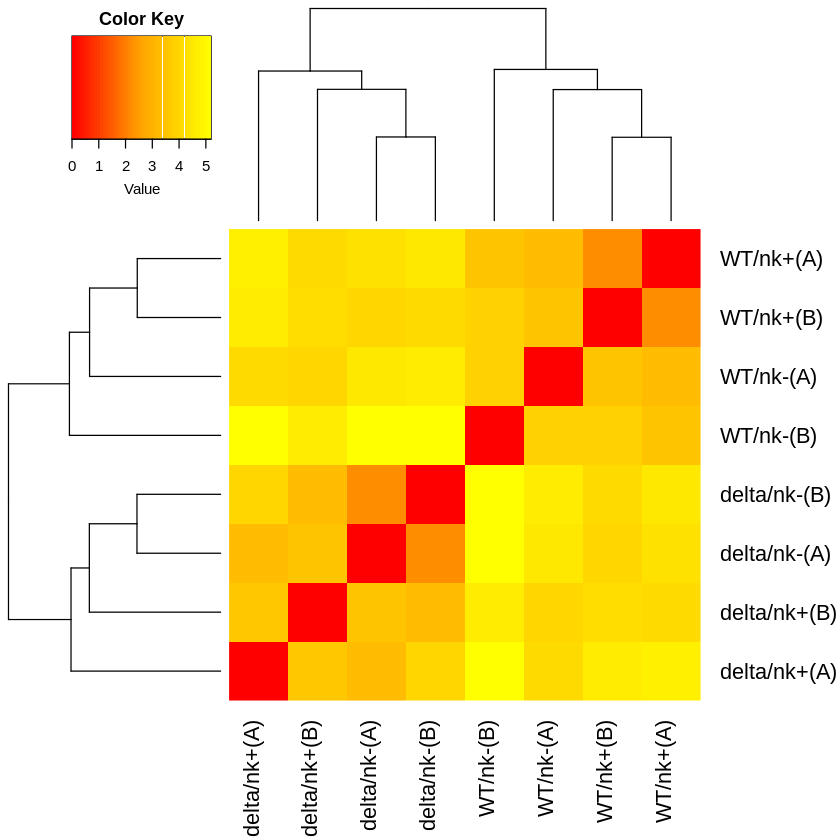

In [46]:
samples <- c("delta/nk-(A)","delta/nk-(B)","delta/nk+(A)","delta/nk+(B)","WT/nk-(A)","WT/nk-(B)","WT/nk+(A)","WT/nk+(B)")

plot_heatmap <- function(filepath) {
    samples <- c("delta/nk-(A)","delta/nk-(B)","delta/nk+(A)","delta/nk+(B)","WT/nk-(A)","WT/nk-(B)","WT/nk+(A)","WT/nk+(B)")
    Colors<-c("red", "orange","yellow")
    Colors<-colorRampPalette(Colors)(50)
    
    mat <- scan(file=filepath, what=integer(), skip=2)
    mat <- matrix(mat, ncol = 8, byrow = TRUE)
    normCounts <- rlog(mat, blind=FALSE)

    batches <- c(rep(1,2), rep(2,2), rep(3,2), rep(4,2))
    #normCountsFrame <- data.frame(normCounts)
    #indx <- rowMeans(normCountsFrame) > 1
    #normCountsFrame <- normCountsFrame[indx,]
    #print(normCountsFrame)
    print(rep(1,2))
    
    adjusted <- ComBat_seq(normCounts, batch=batches, group=NULL)
    
    print(adjusted)

    colnames(adjusted) <- samples
    euc_dist <- dist(t(adjusted), method = "euclidean", diag = TRUE, upper = TRUE, p = 2)
    print(euc_dist)
    
    heatmap.2(as.matrix(euc_dist), col=Colors, trace= "none",margins = c(7, 7), density.info="none")
}

# mat2 <- scan(file="vannini_data_aligned/counts_unfiltered_yesmin_matrix", what=integer(), skip=2)
# mat2 <- matrix(mat2, ncol = 8, nrow = 8, byrow = TRUE, dimnames=list(samples,samples))
# normCounts2 <- rlog(mat2, blind=FALSE)
# euc_dist2 <- dist(t(normCounts2), method = "euclidean", diag = TRUE, upper = TRUE, p = 2)
# 
# 
# mat3 <- scan(file="vannini_data_aligned/counts_filtered_nomin_matrix", what=integer(), skip=2)
# mat3 <- matrix(mat3, ncol = 8, nrow = 8, byrow = TRUE, dimnames=list(samples,samples))
# normCounts3 <- rlog(mat3, blind=FALSE)
# euc_dist3 <- dist(t(normCounts3), method = "euclidean", diag = TRUE, upper = TRUE, p = 2)
# 
# 
# mat4 <- scan(file="vannini_data_aligned/counts_filtered_yesmin_matrix", what=integer(), skip=2)
# mat4 <- matrix(mat4, ncol = 8, nrow = 8, byrow = TRUE, dimnames=list(samples,samples))
# normCounts4 <- rlog(mat4, blind=FALSE)
# euc_dist4 <- dist(t(normCounts4), method = "euclidean", diag = TRUE, upper = TRUE, p = 2)

# plot_heatmap("vannini_data_aligned/counts_unfiltered_nomin_matrix")
# plot_heatmap("vannini_data_aligned/counts_unfiltered_yesmin_matrix")
# plot_heatmap("vannini_data_aligned/counts_filtered_nomin_matrix")
# plot_heatmap("vannini_data_aligned/counts_filtered_yesmin_matrix")
# plot_heatmap("vannini_data_aligned/allfilters_stranded_matrix.txt")

plot_heatmap("vannini_data_aligned/filtered_ex/all_replicates_matrix.txt")



#Colors=c("red", "orange","yellow")
#Colors=colorRampPalette(Colors)(70)

#png(file="replicate_heatmap_unfilt_nomin.png")
#heatmap.2(as.matrix(euc_dist1), col=Colors, trace= "none",margins = c(7, 7), density.info="none")
#dev.off()

#heatmap.2(as.matrix(euc_dist2), col=Colors, trace= "none",margins = c(7, 7), density.info="none")
# 
# png(file="replicate_heatmap_filt_nomin.png")
# heatmap.2(as.matrix(euc_dist3), col=Colors, trace= "none",margins = c(7, 7), density.info="none")
# dev.off()# 
# 
# png(file="replicate_heatmap_filt_yesmin.png")
# heatmap.2(as.matrix(euc_dist4), col=Colors, trace= "none",margins = c(7, 7), density.info="none")
# dev.off()